In [6]:
#e1 create dataset

import pandas as pd
import os
from sklearn.datasets import fetch_openml, make_classification


lidf = []
directory = 'D:/Research_Projects/Reservoir_Project/data/regression_variables/variables_ts_clean_data_avail/'


for fn in os.listdir(directory):
    rddf = pd.read_csv(directory + fn, skip_blank_lines = False, parse_dates=True, encoding='UTF-8')
    lidf.append(rddf)

    seldfidk = pd.concat(lidf, axis=0, ignore_index=True)


def create_regression_dataset():
    reservoir = seldfidk
    df = reservoir.dropna()
    df = df[['height', 'tws', 'precipitation', 'temp']]
    #df = df[['height', 'tws', 'precipitation', 'temp','actual_lon', ' actual_lat','R2 value', 'volume', 'area', 'discharge', 'Res_time', 'depth','wshd_area', 'elevation']]
#need to convert to date time?
#timestamps = pd.date_range(start='2012-1-1 00:00:00', periods=len(df), freq='30T')
    df.to_csv('D:/Research_Projects/Reservoir_Project/ML_outputs/reservoir_regression_data.csv')
    X = df[['tws', 'precipitation', 'temp']]
    y = df['height']
    return df, X, y

def create_datasets():
    df_regression, _, __ = create_regression_dataset()
    return df_regression

if __name__ == '__main__':
    create_datasets()

In [ ]:
#e2 train models
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
#from e1_create_dataset import create_datasets

# create a regression dataset
df_regression = create_datasets()


def train_regression():
    """Train a regression model"""
    # Separate the target variable from features
    y = df_regression['height']
    X = df_regression.drop('height', axis=1)

    model = DecisionTreeRegressor() # Create the model
    model.fit(X, y) # Train the model
    predictions = model.predict(X) # Make some predictions
    return model, predictions, X, y

    # Note that X and y are not very informative variable names, but they are
    # extremely common in Python-based machine learning. Investigate the objects,
    # e.g.: "print('X', type(X), X.shape)"


def train_classification():
    # Train a classification model
    y = df_classification['height']
    X = df_classification.drop('height', axis=1)

    model = DecisionTreeClassifier() # Create the model
    model.fit(X, y) # Train the model
    predictions = model.predict(X) # Make some predictions
    return model, predictions, X, y

    # Take note of the shapes of the prediction arrays. Why are they that shape?
    # Hint: take a look at the input data


if __name__ == '__main__':
    df_regression, df_classification = create_datasets()

    model, predictions, X, y = train_regression()
    print('\nRegression predictions:', predictions, type(predictions), predictions.shape)

    model, predictions, X, y = train_classification()
    print('\n\nClassification predictions:', predictions, type(predictions), predictions.shape)

ValueError: Found array with 0 sample(s) (shape=(0, 3)) while a minimum of 1 is required.

In [ ]:
#e3 metrics
import math
from pprint import pprint

import numpy as np
import pandas as pd
from sklearn.metrics import (mean_absolute_error, mean_absolute_percentage_error,
                             median_absolute_error, mean_squared_error, r2_score)
from sklearn.metrics import (accuracy_score, precision_recall_fscore_support, matthews_corrcoef)

#from e2_train_models import train_classification, train_regression

def regression_scores(actual, predicted):
    """Calculate regression metrics

    :param actual: Original time series values
    :param predicted: Predicted time series values
    :return results: Dictionary of results
    """

    results = {
        'MAE': mean_absolute_error(actual, predicted),
        'MAE2': median_absolute_error(actual, predicted),
        'MAPE': mean_absolute_percentage_error(actual, predicted),
        'ME': np.mean(actual - predicted),
        'MSE': mean_squared_error(actual, predicted),
        'R2': r2_score(actual, predicted),
        'RMSE': math.sqrt(mean_squared_error(actual, predicted)),
    }

    return results


def classification_scores(actual, predicted):
    """Calculate classification metrics

    :param actual: Original labels
    :param predicted: Predicted Labels
    :return: Dict of scores
    """

    scores = {}
    scores['accuracy'] = accuracy_score(actual, predicted)
    scores['matthews_corrcoef'] = matthews_corrcoef(actual, predicted)

    # Get F1 scores, Average Precision, ROC AUC, etc.
    averages = ['micro', 'macro', 'weighted']
    for average in averages:
        precision, recall, f1, _ = precision_recall_fscore_support(actual, predicted, average=average, zero_division=0)
        scores[f'{average}_precision'] = precision
        scores[f'{average}_recall'] = recall
        scores[f'{average}_f1'] = f1
    return scores


if __name__ == '__main__':

    model, predictions, X, y = train_regression()
    scores = regression_scores(y, predictions)
    print('\nregression_scores')
    pprint(scores)

    model, predictions, X, y = train_classification()
    scores = classification_scores(y, predictions)
    print('\nclassification_scores')
    pprint(scores)


regression_scores
{'MAE': 0.0,
 'MAE2': 0.0,
 'MAPE': 0.0,
 'ME': 0.0,
 'MSE': 0.0,
 'R2': 1.0,
 'RMSE': 0.0}

classification_scores
{'accuracy': 1.0,
 'macro_f1': 1.0,
 'macro_precision': 1.0,
 'macro_recall': 1.0,
 'matthews_corrcoef': 1.0,
 'micro_f1': 1.0,
 'micro_precision': 1.0,
 'micro_recall': 1.0,
 'weighted_f1': 1.0,
 'weighted_precision': 1.0,
 'weighted_recall': 1.0}


In [ ]:
#e4 cross validation
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.tree import DecisionTreeClassifier

#from e1_create_dataset import create_classification_dataset
#from e3_metrics import classification_scores

# Recommended reading: https://scikit-learn.org/stable/modules/cross_validation.html

# For time series data, see: https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-of-time-series-data

def holdout():
    # Create a dataset and a model
    _, X, y = create_classification_dataset()
    model = DecisionTreeClassifier()

    # Train using a holdout methodology:
    # 1. Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # 2. Train the model using the training set
    model.fit(X_train, y_train)

    # 3. Make predictions using the trained model on the test set
    preds = model.predict(X_test)

    # 4. Evaluate the model
    print('\nTraining score:', classification_scores(y_train, model.predict(X_train))['accuracy'])
    print('Testing score:', classification_scores(y_test, preds)['accuracy'])


def cross_validation():
    # Create a dataset and a model
    _, X, y = create_classification_dataset()

    # Train and evaluate the model
    # See other scoring metrics here: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
    cv_results = cross_validate(DecisionTreeClassifier(), X, y, cv=5, scoring='accuracy', return_train_score=True)
    print('\nTraining score:', cv_results['train_score'].mean())
    print('Testing scores:', cv_results['test_score'])
    print('Testing scores (averaged):', cv_results['test_score'].mean())


if __name__ == '__main__':
    holdout()
    cross_validation()

    # Which scores are better?
    # Why do the cross-validation scores vary?
    # How do these scores compare to the previous exercise?


Training score: 1.0
Testing score: 0.9

Training score: 1.0
Testing scores: [0.9  0.7  0.85 0.85 0.6 ]
Testing scores (averaged): 0.78


In [ ]:
#e5 recording scores
import csv
import os

import numpy as np

#from e2_train_models import train_classification
#from e3_metrics import classification_scores


def write_to_csv(path, results):
    """Record modelling results in a CSV file.

    :param str path: the result file path
    :param dict results: a dict containing results from running a model
    """

    np.set_printoptions(precision=4)

    if len(results) > 0:
        headers = sorted(list(results.keys()), key=lambda v: str(v).upper())
        if 'model' in headers:
            headers.insert(0, headers.pop(headers.index('model')))

        for key, value in results.items():
            if value is None or value == '':
                results[key] = 'None'

        is_new_file = not os.path.exists(path)
        with open(path, 'a+', newline='') as f:
            writer = csv.writer(f, delimiter=',')
            if is_new_file:
                writer.writerow(headers)
            writer.writerow([results[header] for header in headers])


if __name__ == '__main__':
    model, predictions, __, y = train_classification()
    scores = classification_scores(y, predictions)
    scores = {
        'model': 'Decision Tree', # You can record the model name
        'depth': model.tree_.max_depth, # You can record extra information about the model/data/experiment/etc.
        **scores
    }
    write_to_csv('output/reservoirs/scores.csv', scores)

In [ ]:
#e6 hyperparameter optimization
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.tree import DecisionTreeRegressor

#from e1_create_dataset import create_regression_dataset
#from e3_metrics import regression_scores

# Recommended reading: https://scikit-learn.org/stable/modules/grid_search.html#grid-search

def optimize_model():
    _, X, y = create_regression_dataset()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    distributions =  {
        'criterion': ['absolute_error', 'friedman_mse', 'squared_error'],
        'splitter': ['best', 'random'],
        'max_depth': list(range(3, 15)),
    }

    # Using a grid search
    clf = GridSearchCV(DecisionTreeRegressor(), distributions, cv=5, verbose=1)
    search = clf.fit(X_train, y_train)

    predictions = clf.predict(X_test)
    scores = regression_scores(y_test, predictions)

    num_iterations = search.cv_results_["mean_test_score"].shape[0]
    print(f'\nGrid Search ({num_iterations} iterations):')
    print('Training scores:', search.cv_results_['mean_test_score'].mean())
    print('Test scores:', scores['R2'], '\n')


    # Using a randomized search
    # With RandomizedSearchCV, we can use distributions instead of lists: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
    clf = RandomizedSearchCV(DecisionTreeRegressor(), distributions, n_iter=10, cv=5, verbose=1)
    search = clf.fit(X_train, y_train)

    predictions = clf.predict(X_test)
    scores = regression_scores(y_test, predictions)

    print('\nRandomized Search (10 iterations):')
    print('Training scores:', search.cv_results_['mean_test_score'].mean())
    print('Test scores:', scores['R2'])

    # See also: https://github.com/bayesian-optimization/BayesianOptimization



if __name__ == '__main__':
    optimize_model()
    # Which method is more efficient?

Fitting 5 folds for each of 72 candidates, totalling 360 fits

Grid Search (72 iterations):
Training scores: 0.15549810671923586
Test scores: 0.2893725200685132 

Fitting 5 folds for each of 10 candidates, totalling 50 fits

Randomized Search (10 iterations):
Training scores: 0.1266518507272356
Test scores: 0.260237631866692


In [ ]:
#e7 nested cross validation
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor

#from e1_create_dataset import create_regression_dataset
#from e3_metrics import regression_scores


# Recommended reading: https://scikit-learn.org/stable/auto_examples/model_selection/plot_nested_cross_validation_iris.html
# "Model selection without nested CV uses the same data to tune model parameters and evaluate
# model performance. Information may thus “leak” into the model and overfit the data. The
# magnitude of this effect is primarily dependent on the size of the dataset and the stability
# of the model. See Cawley and Talbot [1] for an analysis of these issues."

def nested_cv():
    """Example of Nested K-Fold Cross-Validation
    """

    _, X, y = create_regression_dataset()

    distributions =  {
        'criterion': ['absolute_error', 'friedman_mse', 'squared_error'],
        'splitter': ['best', 'random'],
        'max_depth': list(range(3, 15)),
    }

    # Outer CV results are what we report as the final model accuracy
    # The inner CV results are useful for analyzing hyperparameter performance

    # Run nested K-Fold CV
    outer_results = []
    kfold = KFold(n_splits=5, random_state=1, shuffle=True)

    for train_index, test_index in kfold.split(X, y): # Outer CV
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Inner CV (Train and test model)
        search = RandomizedSearchCV(DecisionTreeRegressor(), param_distributions=distributions, n_iter=10, cv=5, verbose=1)
        search_result = search.fit(X_train, y_train)
        best_pipeline = search_result.best_estimator_ # Can reference the best estimator directly if neeed
        preds = best_pipeline.predict(X_test)
        r2 = regression_scores(y_test, preds)['R2']

        outer_results.append(r2)

    print('Scores:', outer_results)
    print('Average:', sum(outer_results)/len(outer_results))


if __name__ == '__main__':
    nested_cv()

ValueError: Cannot have number of splits n_splits=5 greater than the number of samples: n_samples=0.

In [ ]:
#e8 handling models
from sklearn.calibration import LinearSVC
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import BayesianRidge, ElasticNet, Lasso, LinearRegression, LogisticRegression, PassiveAggressiveClassifier, PassiveAggressiveRegressor, Perceptron, Ridge, SGDRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, NearestCentroid
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVC, SVR, LinearSVR, NuSVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, ExtraTreeRegressor

#from e1_create_dataset import create_regression_dataset
#from e3_metrics import regression_scores


models_example = {
    'DecisionTreeRegressor': (

        DecisionTreeRegressor,

        {
            'criterion': ['absolute_error', 'friedman_mse', 'squared_error'],
            'splitter': ['best', 'random'],
            'max_depth': [8, 16, 32, 64, 128, None],
        }

    ),
}


regression_models = {
    BayesianRidge.__name__: (BayesianRidge, {
        'n_iter': [150, 300, 450],
        'tol': [1e-2, 1e-3, 1e-4],
        'alpha_1': [1e-5, 1e-6, 1e-7],
        'alpha_2': [1e-5, 1e-6, 1e-7],
        'lambda_1': [1e-5, 1e-6, 1e-7],
        'lambda_2': [1e-5, 1e-6, 1e-7],
    }),
    DecisionTreeRegressor.__name__: (DecisionTreeRegressor, {
        'criterion': ['absolute_error', 'friedman_mse', 'squared_error'],
        'splitter': ['best', 'random'],
        'max_depth': [8, 16, 32, 64, 128, None],
    }),
    ElasticNet.__name__: (ElasticNet, {
        'alpha': [0.2, 0.4, 0.6, 0.8, 1],
        'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1],
        'tol': [1e-5, 1e-4, 1e-3],
        'selection': ['cyclic', 'random'],
    }),
    KernelRidge.__name__: (KernelRidge, { # KRR uses squared error loss while support vector regression uses epsilon-insensitive loss
        'alpha': [0.2, 0.4, 0.6, 0.8, 1.0],
        'kernel': ['linear', 'poly', 'polynomial', 'rbf', 'laplacian', 'cosine'], # additive_chi2 only works with postive values. Sigmoid slow
        'degree': [2, 3, 4, 5, 6],
        'coef0': [0.0, 0.5, 1.0],
    }),
    KNeighborsRegressor.__name__: (KNeighborsRegressor, {
        'n_neighbors': list(range(1, 50)),
        'weights': ['uniform', 'distance'],
        'p': [2, 3, 4],
    }),
    # Lars.__name__: (Lars, {}), # Very high errors across multiple datasets
    Lasso.__name__: (Lasso, {
        'alpha': [0.2, 0.4, 0.6, 0.8, 1.0],
        'tol': [1e-2, 1e-3, 1e-4],
        'selection': ['cyclic', 'random'],
    }),
    LinearRegression.__name__: (LinearRegression, {}),
    LinearSVR.__name__: (LinearSVR, {
        'epsilon': [0.0, 0.5, 1.0],
        'tol': [1e-3, 1e-4, 1e-5],
        'C': [0.01, 0.1, 1.0, 10],
        'loss': ['squared_epsilon_insensitive', 'epsilon_insensitive'],
        'intercept_scaling': [0.001, 0.1, 1, 10],
        'max_iter': [500, 1000, 1500],
    }),
    PassiveAggressiveRegressor.__name__: (PassiveAggressiveRegressor, {
        'C': [0.001, 0.01, 0.1],
        'loss': ['epsilon_insensitive', 'squared_epsilon_insensitive'],
        'epsilon': [0.001, 0.01, 0.1, 1.0],
        # 'average': [True, 10],
        'early_stopping': [True, False],
    }),
    # RadiusNeighborsRegressor # Errors in fitting due to NaNs. Possibly due to radius parameter
    RandomForestRegressor.__name__: (RandomForestRegressor, {
        'n_estimators': [10, 50, 100],
        'criterion': ['absolute_error', 'poisson', 'squared_error'],
        'max_depth': [16, 32, 64, 128, None],
        'max_features':['auto', 'sqrt', 'log2'],
        'bootstrap': [True, False],
    }),
    Ridge.__name__: (Ridge, {
        'alpha': [0.2, 0.4, 0.6, 0.8, 1.0],
        'tol': [1e-2, 1e-3, 1e-4],
        'solver': ['auto', 'svd', 'cholesky', 'sparse_cg', 'lsqr'], # sag & saga removed due to NumPy related bugs
    }),
    SGDRegressor.__name__: (SGDRegressor, {
        'loss': ['squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
        'penalty': ['l2', 'l1', 'elasticnet'],
        'alpha': [1e-3, 1e-4, 1e-5],
        'l1_ratio': [0.0, 0.15, 0.5, 1.0],
        'max_iter': [100, 1000, 10000],
        'tol': [1e-2, 1e-3, 1e-4],
        'epsilon': [0.001, 0.01, 0.1, 1.0],
        'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
        'early_stopping': [True, False],
    }),
    SVR.__name__: (SVR, {
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'degree': [2, 3, 4, 5, 6],
        'gamma': ['scale', 'auto'],
        'coef0': [0.0, 0.5, 1.0],
        'tol': [1e-3, 1e-4, 1e-5],
        'C': [0.01, 0.1, 1.0, 10, 100],
        'epsilon': [0.0, 0.5, 1.0],
        'shrinking': [True, False],
        'max_iter': [50, 100, 150, 200, 250, 300],
    }),
}

if __name__ == '__main__':

    _, X, y = create_regression_dataset()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    for model_name, elements in regression_models.items():
        print('\n', model_name)
        model = elements[0]() # Constructor
        distributions = elements[1] # hyperparameter search space

        # Train the model
        search = RandomizedSearchCV(model, param_distributions=distributions, n_iter=10, verbose=1)
        predictions = search.fit(X_train, y_train)
        predictions = search.predict(X_test)
        scores = regression_scores(y_test, predictions)
        print(scores['R2'])


ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [ ]:
#e9 pipelines
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.discriminant_analysis import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor

#from e1_create_dataset import create_regression_dataset
#from e3_metrics import regression_scores
#from e8_handling_models import regression_models


def build_pipeline(model_name):
    # Create dataset
    _, X, y = create_regression_dataset()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    model_space = { f'model__{k}': v for k, v in regression_models[model_name][1].items() }

    distributions = {
        **model_space,
        'feature_selector__k': [1, 2, 3] # Probably not useful in this example. For demonstration only
        }

    class Debugger(BaseEstimator, TransformerMixin):
        def __init__(self, name=''):
            self.name = name

        def fit(self, X, _):
            print(f'Pipeline debugger {self.name} - X.shape: {X.shape}')
            return self

        def transform(self, X, y=None):
            return X

    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        # ('debugger', Debugger()), # Useful for debugging pipeline errors
        ('feature_selector', SelectKBest(f_regression)), # Use if you have too many (unhelpful) features
        ('model', DecisionTreeRegressor()),
    ])


    # Train models
    clf = RandomizedSearchCV(pipeline, distributions, n_iter=10, cv=5, verbose=1)
    search = clf.fit(X_train, y_train)

    # Evaluate
    predictions = clf.predict(X_test)
    scores = regression_scores(y_test, predictions)
    print('Training scores:', search.cv_results_['mean_test_score'].mean())
    print('Best parameters:', search.best_params_)
    print('Test scores:', scores['R2'])


if __name__ == '__main__':
    build_pipeline('DecisionTreeRegressor')

ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [ ]:
#e10 serialiation
from joblib import dump, load
#from e2_train_models import train_regression

# Recommended reading: https://scikit-learn.org/stable/model_persistence.html


if __name__ == '__main__':
    # Train an example model
    model, _, X, ___ = train_regression()

    # Save model as a file
    dump(model, 'model.joblib')

    # Load model model from file
    loaded_model = load('model.joblib')
    predictions = loaded_model.predict(X)
    print('Finished')

Finished


In [ ]:
#e11 custom models
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TerminateOnNaN
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

#from e1_create_dataset import create_classification_dataset
#from e2_train_models import train_classification
#from e3_metrics import classification_scores



class DNN:
    """Densely-connected Neural Network classifier"""

    search_space = {
        'architecture': [
            [64], [32], # 1 layer
            (128, 64), (64, 32), (32, 16), # 2 shrinking layers
            (128, 64, 32), (64, 32, 16), # 3 shrinking layers
            (256, 128, 64, 32), (128, 64, 32, 16),  # 4 shrinking layers
            (256, 256), (128, 128), (64, 64), (32, 32), # 2 static layers
            (256, 256, 128, 64, 32), (128, 128, 64, 32), (64, 64, 32), (32, 32), # Static + shrinking layers
        ],
        'batch_normalization': [True, False],
        'batch_size': [32],
        'dropout': [None, 0.1, 0.2, 0.3, 0.4, 0.5],
        'early_stopping': [None, 3, 5, 7, 9],
        'epochs': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
        'final_activation': ['sigmoid', 'tanh'], # relu performs poorly
        'hidden_activation': ['sigmoid', 'tanh', 'relu'],
        'optimizer': ['adadelta', 'adam', 'rmsprop', 'sgd'],
        'reduce_lr': [True, False],
    }

    def __init__(self, **kwargs):
        # Get values or assign default values if missing
        self.architecture = kwargs.get('architecture', (64, 32))
        self.batch_normalization = kwargs.get('batch_normalization', True)
        self.batch_size = kwargs.get('batch_size', 32)
        self.dropout = kwargs.get('dropout', 0.2)
        self.early_stopping = kwargs.get('early_stopping', 5)
        self.epochs = kwargs.get('epochs', 5)
        self.final_activation = kwargs.get('final_activation', 'sigmoid')
        self.hidden_activation = kwargs.get('hidden_activation', 'sigmoid')
        self.optimizer = kwargs.get('optimizer', 'adam')
        self.reduce_lr = kwargs.get('reduce_lr', True)

        self.verbose = kwargs.get('verbose', 0)
        self.input_shape = (256,)

    def fit(self, X, y):
        verbosity = int(os.environ.get('keras_verbosity', 0))
        self.input_shape = (X.shape[1],)

        # Initialize class weights
        label_counts = dict(pd.Series(y).value_counts())
        num_labels = len(label_counts)
        self.class_weights = {
            int(k): (1 / v) * (y.shape[0] / num_labels) / 2
            for k, v in label_counts.items()
        }
        y = to_categorical(y)

        # Initialize callbacks
        callbacks = [TerminateOnNaN()]
        if self.early_stopping != None:
            callbacks.append(EarlyStopping(monitor='val_loss', mode='min', verbose=verbosity,
                                           patience=self.early_stopping))

        if self.reduce_lr:
            callbacks.append(ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.001))

        # Create model
        self.model = Sequential()
        for i, shape in enumerate(self.architecture):
            if i == 0:
                self.model.add(Dense(shape, input_shape=self.input_shape))
            else:
                self.model.add(Dense(shape))

            if self.batch_normalization:
                self.model.add(BatchNormalization())

            self.model.add(Activation(self.hidden_activation))

            if self.dropout != None:
                self.model.add(Dropout(self.dropout))

        self.model.add(Dense(num_labels, activation=self.final_activation))

        # Compile model
        metric = CategoricalAccuracy('balanced_accuracy')
        self.model.compile(loss='categorical_crossentropy', optimizer=self.optimizer, metrics=[metric])
        # print(self.model.summary())

        # Train model
        self.model.fit(X, y, validation_split=0.1, class_weight=self.class_weights, epochs=self.epochs,
                       batch_size=self.batch_size, verbose=verbosity, callbacks=callbacks)

    def predict(self, X):
        predict_raw = self.model.predict(X)
        preds = np.argmax(predict_raw, axis=1)
        return preds

    def get_params(self, deep=True):
        return {
            'architecture': self.architecture,
            'batch_size': self.batch_size,
            'epochs': self.epochs,
            'final_activation': self.final_activation,
            'hidden_activation': self.hidden_activation,
            'optimizer': self.optimizer,
            'verbose': self.verbose,
        }

    def set_params(self, **params):
        if not params:
            return self

        for key, value in params.items():
            if hasattr(self, key):
                setattr(self, key, value)
            else:
                self.kwargs[key] = value
        return self


class ExampleModel:
    search_space = {}

    def __init__(self, **kwargs):
        # initialize the model here
        pass

    def fit(self, X, y):
        pass

    def predict(self, X):
        return np.ones(len(X))

    def get_params(self, deep=True):
        return {}

    def set_params(self, **params):
        return self


custom_models = {
    'DecisionTreeClassifier': (DecisionTreeClassifier, { 'max_depth': [8, 16, 32, 64, 128, None] }),
    ExampleModel.__name__: (ExampleModel, ExampleModel.search_space),
    DNN.__name__: (DNN, DNN.search_space),
}


if __name__ == '__main__':
    _, X, y = create_classification_dataset()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    for model_name, elements in custom_models.items():
        print('\n', model_name)
        model = elements[0]() # Constructor
        distributions = elements[1] # hyperparameter search space

        # Train the model
        search = RandomizedSearchCV(model, param_distributions=distributions, scoring='accuracy', n_iter=5, verbose=1)
        predictions = search.fit(X_train, y_train)
        predictions = search.predict(X_test)
        scores = classification_scores(y_test, predictions)
        print(scores['accuracy'])


 DecisionTreeClassifier
Fitting 5 folds for each of 5 candidates, totalling 25 fits
0.9

 ExampleModel
Fitting 5 folds for each of 1 candidates, totalling 5 fits
0.45

 DNN
Fitting 5 folds for each of 5 candidates, totalling 25 fits


c:\Users\jess_besnier\anaconda3\envs\mlenv\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 1 is smaller than n_iter=5. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


1/1 [==============================] - 0s 74ms/step
0.95


In [ ]:
#e12 time series
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.multioutput import MultiOutputRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
from sklearn.tree import DecisionTreeRegressor

#from e1_create_dataset import create_regression_dataset


def daily_statistics(input_path=None, output_path='df_daily.csv'):
    """Get daily mean, minimum and maximum values for each column in a time series dataset

    :param input_path: Path to input CSV file (str), defaults to None
    :param output_path: Path to output CSV file (str), defaults to 'df_daily.csv'
    """

    # Read the dataset into a DataFrame
    if input_path is None:
        df, _, __ = create_regression_dataset()
    else:
        df = pd.read_csv(input_path, index_col=0)

    # Convert strings to NaNs and impute values
    columns = df.columns
    index = df.index
    for col in columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    df = df.astype(float)
    df = SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(df)
    df = pd.DataFrame(df, index=index, columns=columns)

    # Convert the index to datetime format (this should also work for any columns)
    df.index = pd.to_datetime(df.index)

    # Make sure data is numerical
    df = df.astype(float)

    # Resample data to daily and calculate the minimum, maximum, and average
    df_daily_mean = df.resample('D').mean()
    df_daily_min = df.resample('D').min()
    df_daily_max = df.resample('D').max()
    df_daily = pd.concat([df_daily_mean, df_daily_min, df_daily_max], axis=1)

    # Provide columns names. This works even if multiple input columns existed in df
    column_names = []
    for col in df.columns:
        column_names.append(f'Mean_{col}')
        column_names.append(f'Minimum_{col}')
        column_names.append(f'Maximum_{col}')
    df_daily.columns = column_names

    # print(df_daily.shape) # It is a good idea to check shapes
    df_daily.to_csv(output_path)


def time_series_to_tabular():
    df, _, __ = create_regression_dataset()

    TARGET = 'temp' # The column in df we want to forecast
    LAG = 6 # This is how far back we want to look for features
    HORIZON = 3 # This is how far forward we want forecast


    def create_lag_features(df, target, lag):
        """Create features for our ML model (X matrix).

        :param df: DataFrame
        :param lag: Lookback window (int)
        """
        for col in df.columns:
            if col != target:
                for i in range(1, lag+1):
                    df[f'{col}-{i}'] = df[col].shift(i)

                df = df.drop(col, axis=1)

        # OPTIONAL: Drop first N rows where N = lag
        df = df.iloc[lag:]
        return df


    def create_future_values(df, target, horizon):
        targets = [ target ]
        for i in range(1, horizon):
            col_name = f'{target}+{i}'
            df[col_name] = df[target].shift(-i)
            targets.append(col_name)

        # Drop rows missing future target values
        df = df[df[targets[-1]].notna()]
        return df, targets


    print('\nInitial df shape:', df.shape)

    # Create feature data (X)
    df = create_lag_features(df, TARGET, LAG)
    print('\ndf shape after feature creation:', df.shape)

    # Create targets to forecast (y)
    df, targets = create_future_values(df, TARGET, HORIZON)
    print('\ndf shape after feature creation:', df.shape)

    # Separate features (X) and targets (y)
    y = df[targets]
    X = df.drop(targets, axis=1)
    print('\nShape of X (features):', X.shape)
    print('Shape of y (target(s)):', y.shape)

    # Add features to capture hour of day. Try also: .day_of_year, .day_of_week, etc.
    # Read: https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.html
    X['hour'] = X.index.hour
    X['sin_hour'] = np.sin(2 * np.pi * X['hour'].apply(lambda ts: int(ts))/24.0)
    X['cos_hour'] = np.cos(2 * np.pi * X['hour'].apply(lambda ts: int(ts))/24.0)
    del X['hour'] # Optional

    # Examine the shapes of the created dataframes and arrays.
    # Look at the column names, e.g.: "print(df.columns)"

    X.to_csv('e12_X.csv')
    y.to_csv('e12_y.csv')

    return X, y


def forecasting_example():
    """Examples of fitting forecasting models using the methodology of time_series_to_tabular()
    """
    X, y = time_series_to_tabular()

    # Using a model
    print('\nTraining model')
    model = MultiOutputRegressor(LinearRegression())
    model.fit(X, y)
    preds = model.predict(X)
    print('Model works')

    # Using a pipeline and RandomizedSearchCV
    print('\nTraining pipeline')
    scaler_space = { f'scaler__norm': ['l1', 'l2', 'max'] }
    feature_selector_space = { f'multioutput__estimator__feature_selector__k': [1, 2, 3] }
    model_space = { f'multioutput__estimator__model__max_depth': [5, 10, 15, 20] }
    distributions = {
                     **scaler_space,
                     **feature_selector_space,
                     **model_space
                    }

    pipeline = Pipeline([
        ('scaler', Normalizer()),
        ('multioutput', MultiOutputRegressor(
            Pipeline([
                ('feature_selector', SelectKBest(f_regression)),
                ('model', DecisionTreeRegressor())
            ])
        ))
    ])
    clf = RandomizedSearchCV(pipeline, distributions, n_iter=10, cv=5, verbose=1)
    clf.fit(X, y)
    preds = clf.predict(X)
    print('Pipeline works\n')


if __name__ == '__main__':
    daily_statistics(output_path='df_daily.csv')
    # daily_statistics(input_path='hourly_data.csv', output_path='hourly_data_statistics.csv')

    time_series_to_tabular()

    forecasting_example()



Initial df shape: (3051, 4)

df shape after feature creation: (3045, 19)

df shape after feature creation: (3043, 21)

Shape of X (features): (3043, 18)
Shape of y (target(s)): (3043, 3)


AttributeError: 'Int64Index' object has no attribute 'hour'

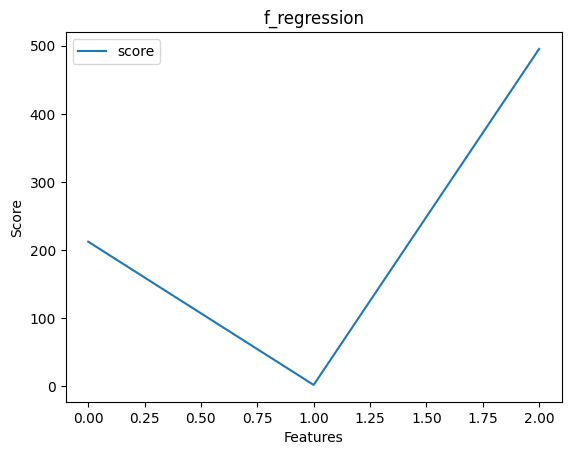

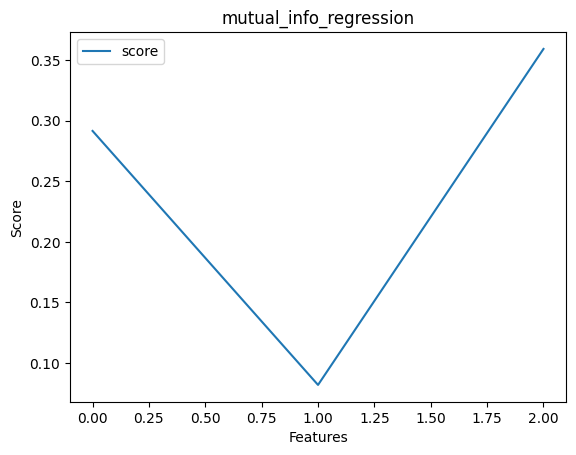

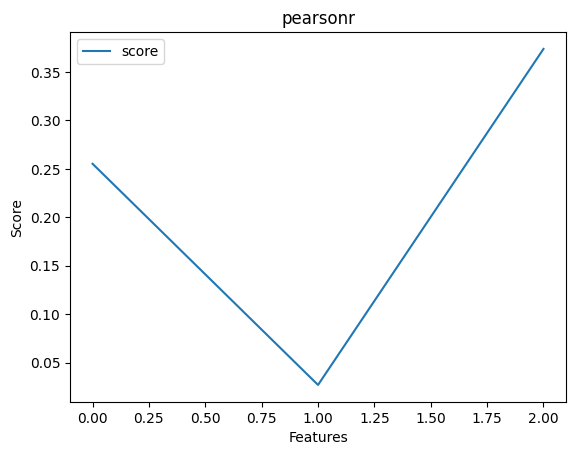

In [ ]:
#e13 feature selection
import os

import pandas as pd
from scipy import stats
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

#from e1_create_dataset import create_regression_dataset


# For an example of using feature selection in a pipeline, see example e9_pipelines.py


def feature_scoring_example(output_dir='feature_scores'):
    _, X, y = create_regression_dataset()

    os.makedirs(output_dir, exist_ok=True) # Make a directory called feature_scores

    def plot_scores(scoring_function, filename):
        if scoring_function == None:
            results = []
            for col in X.columns:
                try:
                    weight = abs(stats.pearsonr(X[col], y.iloc[:,0])[0])
                except:
                    weight = abs(stats.pearsonr(X[col], y)[0])
                results.append({ 'feature': col, 'score': weight })
            weights = pd.DataFrame(results)
        else:
            selector = SelectKBest(scoring_function, k=3)
            _ = selector.fit_transform(X, y)
            weights = pd.DataFrame({'feature': X.columns, 'score': selector.scores_})

        weights.to_csv(os.path.join(output_dir, f'{filename}.csv'))
        plot = weights.plot(title=filename)
        fig = plot.get_figure()
        plot.set_xlabel('Features')
        plot.set_ylabel('Score')
        fig.savefig(os.path.join(output_dir, f'{filename}.png'))

    plot_scores(f_regression, 'f_regression')
    plot_scores(mutual_info_regression, 'mutual_info_regression')
    plot_scores(None, 'pearsonr')

if __name__ == '__main__':
    feature_scoring_example()

ValueError: x and y must be the same size

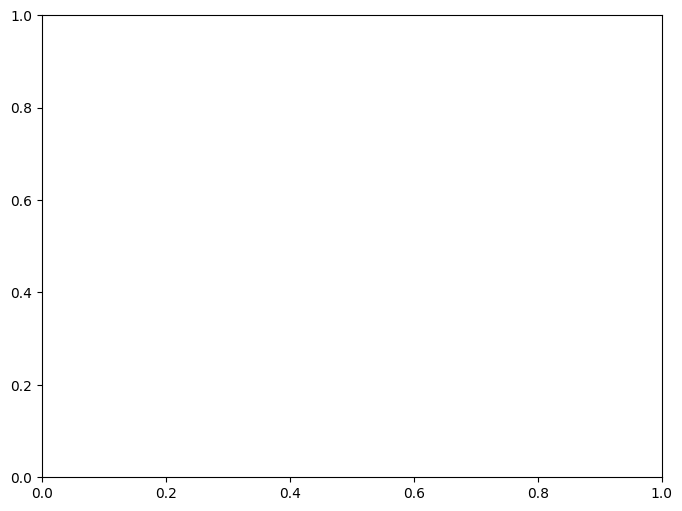

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y, predictions, color='blue', alpha=0.5)
plt.plot([min(y), max(y)], [min(predictions), max(predictions)], color='red')
plt.xlabel('Actual Reservoir Level')
plt.ylabel('Predicted Reservoir Level')
plt.title(f'{model_name} - Predicted vs Actual')
plt.show()